## Monte Carlo Simulations for Marketing 

The goal of this project is to using Monte Carolo to explore customer acquisition and marketing spending of different channal. As a great way to learn about something uncertain is to simulate it with reseasonal inputs and assumptions, Monte Carlo simulation is great statistic experiment to study the uncertainty and help you establish intuition of how to make strategic descision regarding, in project, allocation of the marketing investment according to number of customers acquired from each marketing channal.

To establish the idea of how to allocate the marketing spending on each channal, we can test out with this Monte Carlo similation with different spending to see which channal would generate high probability of acquiring more customers with low spending.

- I setup the simulation according to the average CPM from online research and the information is provided below. 
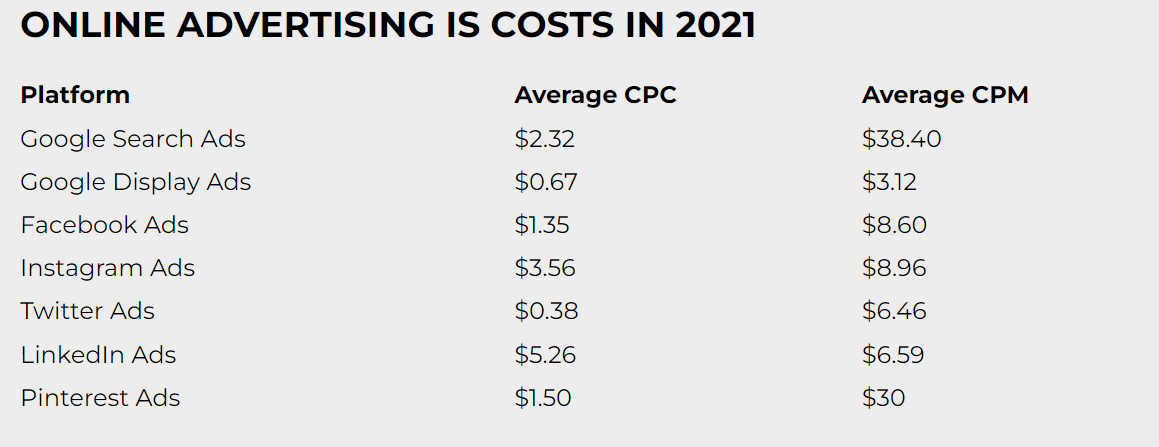

In [8]:
import pandas as pd
import numpy as np
from random import randint
import random
from matplotlib import pyplot as plt

### Overview of the Setup
- Use a randomly generated number to represent the outcome of each impression
- Each impression has a tiny probability of turning into a paying customer (CTR)
- Then tally up our results (using a for loop)
- Our budget and the CPM (cost per 1,000 impressions from an ad vendor like Google) determines the number of trials

### Defined Important Functions
- Here we can take advantage of binomial distribution to randomly decide which customer would convert (which would not convert) from our marketing activity
- Binomial distribution produces a binary outcome and where each of the outcome is independent of all the others

In [3]:
#Function for calculating the results of a marketing campaign
def run_campaign(spend, cpm, conversion_rate):
    return np.random.binomial(spend/cpm*1000, conversion_rate)

- Spend is the amount that we plan to spend on our marketing campaign of each channal
- CPM is the cost for 1,000 impressions
- Two conversion rate related variables are our estimates for the rate’s expected value and standard deviation

In [4]:
# From the expected conversion rate and stdev of it, get the
# realized conversion rate
def get_conversion_rate(expected, stdev):
    conversion_rate = max(expected + np.random.normal()*stdev, 
                          0.000001)
    return conversion_rate

# Test Run for One time

### Varibles Needed to be Defined:

- Makreting spending of the channal
- CPM of the channal
- CTR of the channal
- Conversion rate of the channal

In [25]:
# Budget
spend = 750000
# Cost per thousand
cpm = 38.4
# Conversion rate
conversion_rate_expected = 0.0005
conversion_rate_stdev = 0.00002


# Let's call it to get the number of new customers from our campaign
conversion_rate = get_conversion_rate(conversion_rate_expected, 
                                      conversion_rate_stdev)
cohort_size = run_campaign(spend, cpm, conversion_rate)# And calculate our Customer Acquisition cost
CAC = spend/cohort_size
print('Customers Gained: ', cohort_size)
print('CAC: ', round(CAC, 2))

Customers Gained:  10003
CAC:  74.98


- To make the simulation mimic the reality, I have created a marketing funnel filtered by key metrics, CTR and Conversion Rate.
- At the first funnel, customers who are exposed to the ad impression would either click the ad or not click. 
- At the second funnel, customers who click the ad would either convert to buy (or enroll) or not buy (not enroll), depend on the objective of the marketing event. 
- The number of customers who would click and convert depends on the historical result of your marketing event. In this project, I set up a approximate CTR and conersion rate as 'expected rate' and add a expected standard deviation to include some randomness in the simulation.

## Google Search Ads

In [16]:
conversion_rate_expected = 0.005 # expected conversion rate 
conversion_rate_stdev = 0.0002  #  standard deviation to include some randomness in the simulation

CTR=0.01  # expected CTR 
CTR_std=0.0003  #  standard deviation to include some randomness in the simulation

cpm = 38.4

spend = 50000 

cohort_size_list=[]

for i in range(100000):
    
    #  first funnel:generate CTR rate
    conversion_rate_CTR = get_conversion_rate(CTR, 
                                      CTR_std)
    cohort_size_CTR = run_campaign(spend, cpm, conversion_rate_CTR)



    #  second funnel: generate conversion rate
    conversion_num = get_conversion_rate(conversion_rate_expected, 
                                      conversion_rate_stdev)
    cohort_size=np.random.binomial(cohort_size_CTR, conversion_num)
            

    cohort_size_list.append(cohort_size)

    
# Store simulation results in a dataframe
results_df = pd.DataFrame()
results_df['cohort_size'] = cohort_size_list



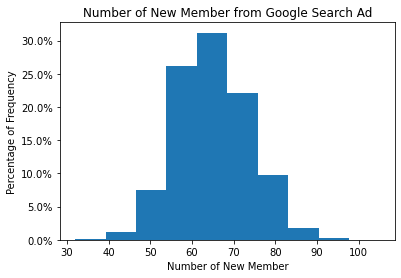

In [25]:
from matplotlib.ticker import PercentFormatter
plt.hist(results_df['cohort_size'],weights=np.ones(len(results_df['cohort_size'])) / len(results_df['cohort_size']))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Number of New Member from Google Search Ad')
plt.xlabel('Number of New Member')
plt.ylabel('Percentage of Frequency')
plt.show()

## Conclusion
We can see from the char above that, with $50,000 spending, number of new member acquired from Google Search Ad is 65 on average. It converts as high as almost 100 new customers and as low as almost 30 customers.Based on these results, you can develop a idea of how do you invest in Google Search Ad.

One benefit of the Monte Carlo Simulation is it help you develop a better unserstand of the distribution of likely outcome and can use that knowledge plus your business acumen to make an informed estimate.

The other value of this model is that you can model many different assumptions and see what happens. Here are some simple changes you can make to see how the results change:

- Increase the spending or decrease the spending 
- Change the expected standard deviation to a higher amount if you want measure more uncertainty

I have setup the simulation for additional two channals below.

# Facebook Ads

In [18]:
conversion_rate_expected = 0.005 # expected conversion rate 
conversion_rate_stdev = 0.00002  #  standard deviation to include some randomness in the simulation

CTR=0.01  # expected CTR 
CTR_std=0.001  #  standard deviation to include some randomness in the simulation

cpm = 8.6

spend = 750000 

cohort_size_list=[]

for i in range(100000):
    
    # first funnel:generate CTR rate
    conversion_rate_CTR = get_conversion_rate(CTR, 
                                      CTR_std)
    cohort_size_CTR = run_campaign(spend, cpm, conversion_rate_CTR)



    # second funnel: generate conversion rate
    conversion_num = get_conversion_rate(conversion_rate_expected, 
                                      conversion_rate_stdev)
    cohort_size=np.random.binomial(cohort_size_CTR, conversion_num)
            

    cohort_size_list.append(cohort_size)

    
# Store simulation results in a dataframe
results_FB = pd.DataFrame()
results_FB['cohort_size'] = cohort_size_list



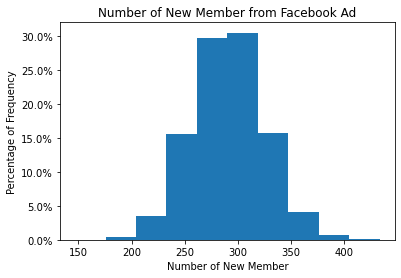

In [24]:

plt.hist(results_FB['cohort_size'],weights=np.ones(len(results_FB['cohort_size'])) / len(results_FB['cohort_size']))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Number of New Member from Facebook Ad')
plt.xlabel('Number of New Member')
plt.ylabel('Percentage of Frequency')
plt.show()

# Instagram Ad

In [20]:
conversion_rate_expected = 0.008 # expected conversion rate 
conversion_rate_stdev = 0.0005  #  standard deviation to include some randomness in the simulation

CTR=0.02  # expected CTR 
CTR_std=0.001  #  standard deviation to include some randomness in the simulation

cpm = 8.96

spend = 70000 

cohort_size_list=[]

for i in range(100000):
    
    # first funnel:generate CTR rate
    conversion_rate_CTR = get_conversion_rate(CTR, 
                                      CTR_std)
    cohort_size_CTR = run_campaign(spend, cpm, conversion_rate_CTR)



    # second funnel: generate conversion rate
    conversion_num = get_conversion_rate(conversion_rate_expected, 
                                      conversion_rate_stdev)
    cohort_size=np.random.binomial(cohort_size_CTR, conversion_num)
            

    cohort_size_list.append(cohort_size)

    
# Store simulation results in a dataframe
results_IG = pd.DataFrame()
results_IG['cohort_size'] = cohort_size_list



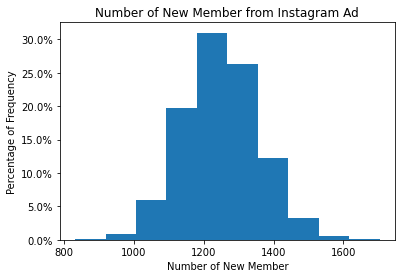

In [22]:

plt.hist(results_IG['cohort_size'],weights=np.ones(len(results_IG['cohort_size'])) / len(results_IG['cohort_size']))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Number of New Member from Instagram Ad')
plt.xlabel('Number of New Member')
plt.ylabel('Percentage of Frequency')
plt.show()